In [1]:
import numpy as np
import urllib
import gzip
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
# Softmax function
def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

# Improved softmax function without overflow errors
def softmax_stable(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a / np.sum(exp_a)

# Test softmax functions
a = np.array([900, 1000])
print(softmax(a))          # Original softmax (may overflow)
print(softmax_stable(a))   # Improved softmax

[nan nan]
[3.72007598e-44 1.00000000e+00]


C:\Users\saadsrin\AppData\Local\Temp\ipykernel_3432\617084951.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(a) / np.sum(np.exp(a))
C:\Users\saadsrin\AppData\Local\Temp\ipykernel_3432\617084951.py:3: RuntimeWarning: invalid value encountered in divide
  return np.exp(a) / np.sum(np.exp(a))


In [3]:
# Define the MnistData class
class MnistData:
    image_dim = (28, 28)
    image_size = image_dim[0] * image_dim[1]
    dataset_dir = 'dataset'
    dataset_pkl = 'mnist.pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/'  # 'https://yann.lecun.com/exdb/mnist/'

    key_file = {
        'train_images': 'train-images-idx3-ubyte.gz',
        'train_labels': 'train-labels-idx1-ubyte.gz',
        'test_images': 't10k-images-idx3-ubyte.gz',
        'test_labels': 't10k-labels-idx1-ubyte.gz'
    }

    def __init__(self):
        self.dataset = {}
        self.dataset_pkl_path = f'{self.dataset_dir}/{self.dataset_pkl}'
        
        if not os.path.exists(self.dataset_dir):
            os.mkdir(self.dataset_dir)
        
        self._init_dataset()

    def _change_one_hot_label(self, y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        return t

    def _download(self, file_name):
        file_path = f"{self.dataset_dir}/{file_name}"
        
        if os.path.exists(file_path):
            print(f'File: {file_name} already exists.')
            return
        
        print(f'Downloading {file_name}...')
        
        opener = urllib.request.build_opener()
        opener.addheaders = [('Accept', '')]
        urllib.request.install_opener(opener)
        
        urllib.request.urlretrieve(self.url_base + file_name, file_path)
        print('Done')

    def _download_all(self):
        for file_name in self.key_file.values():
            self._download(file_name)

    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size)
        return images

    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
        return labels

    def _create_dataset(self):
        self.dataset['train_images'] = self._load_images(f"{self.dataset_dir}/{self.key_file['train_images']}")
        self.dataset['train_labels'] = self._load_labels(f"{self.dataset_dir}/{self.key_file['train_labels']}")
        self.dataset['test_images'] = self._load_images(f"{self.dataset_dir}/{self.key_file['test_images']}")
        self.dataset['test_labels'] = self._load_labels(f"{self.dataset_dir}/{self.key_file['test_labels']}")
        
        with open(self.dataset_pkl_path, 'wb') as f:
            print(f'Pickle: {self.dataset_pkl_path} is being created.')
            pickle.dump(self.dataset, f)
            print('Done.')

    def _init_dataset(self):
        self._download_all()
        if os.path.exists(self.dataset_pkl_path):
            with open(self.dataset_pkl_path, 'rb') as f:
                print(f'Pickle: {self.dataset_pkl_path} already exists.')
                print('Loading...')
                self.dataset = pickle.load(f)
                print('Done.')
        else:
            self._create_dataset()

    def load(self):
        for key in ['train_images', 'test_images']:
            self.dataset[key] = self.dataset[key].astype(np.float32) / 255.0

        for key in ['train_labels', 'test_labels']:
            self.dataset[key] = self._change_one_hot_label(self.dataset[key], 10)

        return (self.dataset['train_images'], self.dataset['train_labels']), \
               (self.dataset['test_images'], self.dataset['test_labels'])


# Testing MnistData class
mnist_data = MnistData()
(train_images, train_labels), (test_images, test_labels) = mnist_data.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


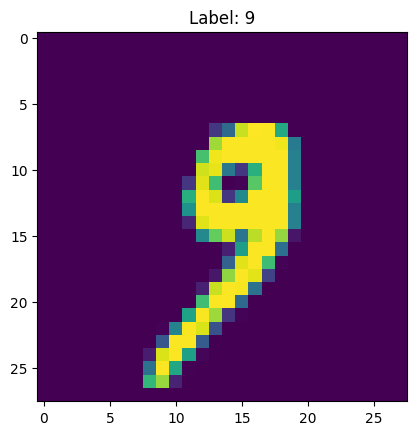

Label (one-hot): [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [4]:
# Show the loaded images and labels are proper
idx = 1000
plt.imshow(test_images[idx].reshape(28, 28))
plt.title(f"Label: {np.argmax(test_labels[idx])}")
plt.show()
print(f"Label (one-hot): {test_labels[idx]}")

In [5]:
# Show one hot encoding result
y = np.array([0, 1, 2, 3])
print(mnist_data._change_one_hot_label(y, 10))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


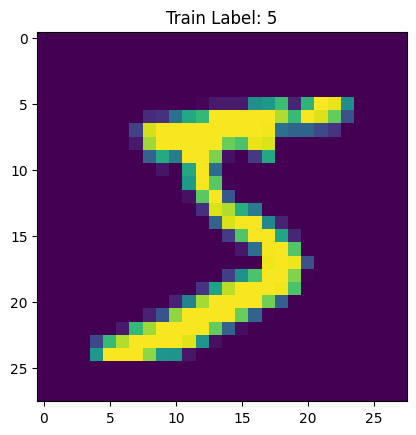

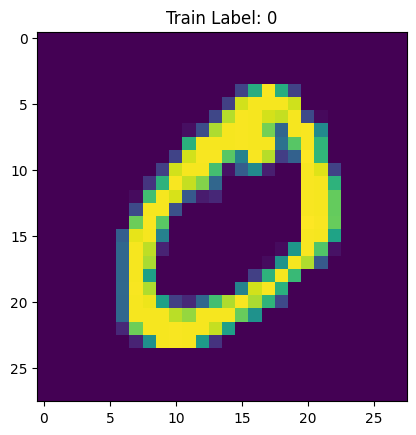

In [6]:
# Show MnistData class is working for train
for i in [0, 1]:
    plt.imshow(train_images[i].reshape(28, 28))
    plt.title(f"Train Label: {np.argmax(train_labels[i])}")
    plt.show()

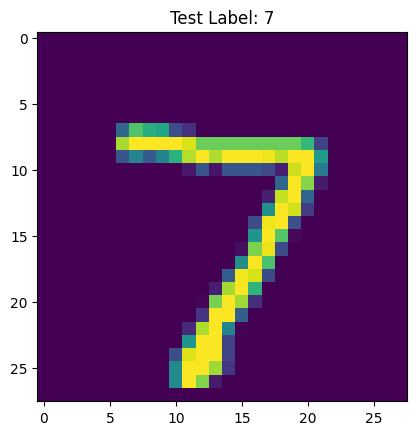

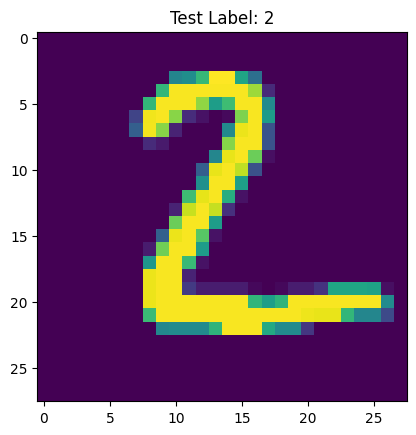

In [7]:
# Show MnistData class is working for test
for i in [0, 1]:
    plt.imshow(test_images[i].reshape(28, 28))
    plt.title(f"Test Label: {np.argmax(test_labels[i])}")
    plt.show()